<a href="https://colab.research.google.com/github/zsunberg/ai4all-berkeley-driving/blob/master/1-6%20Reward%20Shaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! git clone https://github.com/zsunberg/ai4all-berkeley-driving
! pip install stable-baselines
! pip install celluloid
! pip install numpy==1.17.0

In [0]:
%cd ai4all-berkeley-driving

In [1]:
from driving.ui import *
env = DrivingEnv()

/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/robbizorg/anaconda3/lib/python3.6/site-packages/tensorflow/python/f

# 1. Goal

Go to the track and stay on it.

# 2. Reward

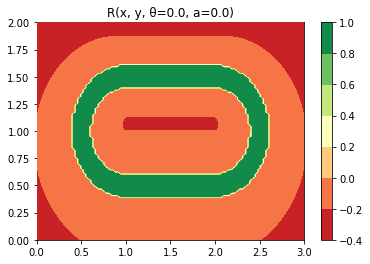

In [2]:
def my_reward(x, y, theta, a):
    # Put your reward function here
    # you might want to use the (signed) distance from the track, d
    d, angle = env.distance_angle(x, y, theta)
    
    rda = -0.3*abs(d) - 0.0005*abs(angle) # This penalizes distance from the road and angle from the road
    ra = -0.001*abs(a) # This Penalizes Larger Turns

    r = rda + ra

    if abs(d) <= 0.1:
      r = 1 + ra
    
    if abs(d) >= 2.0:
      r -= 20
    return r
    
    
env.reward = my_reward
plot_reward(my_reward)

# 3. DQN

In [0]:
model = StudentQModel(env, exploring_rate=0.3)

In [0]:
model.train(20000, model_name="my_model")

# 4. Policy

In [0]:
def my_q_policy(x, y, theta):
    # implement a policy that maximizes model.q_value(x, y, theta, a)
    # just like you did for the reward function
    return 0.0

# 5. Goal Accomplished!!

In [0]:
cam = record(env, my_q_policy)

In [0]:
cam.animate().save("my_simulation.mp4")